In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/drive/MyDrive/ELML_CEMENT/cement_data.csv")

In [17]:
df.shape

(1030, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyAsh            1030 non-null   float64
 3   Water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseAggregate   1030 non-null   float64
 6   FineAggrigate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
rename=["cement","slag","flyAsh","Water","superplasticizer","coarseAggregate","FineAggrigate","age","strength"]

In [8]:
df.describe()


,cement,slag,flyAsh,Water,superplasticizer,coarseAggregate,FineAggrigate,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [19]:
df.isnull().sum()


cement              0
slag                0
flyAsh              0
Water               0
superplasticizer    0
coarseAggregate     0
FineAggrigate       0
age                 0
strength            0
dtype: int64

In [21]:
df.corr()

,cement,slag,flyAsh,Water,superplasticizer,coarseAggregate,FineAggrigate,age,strength
cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
flyAsh,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
coarseAggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
FineAggrigate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


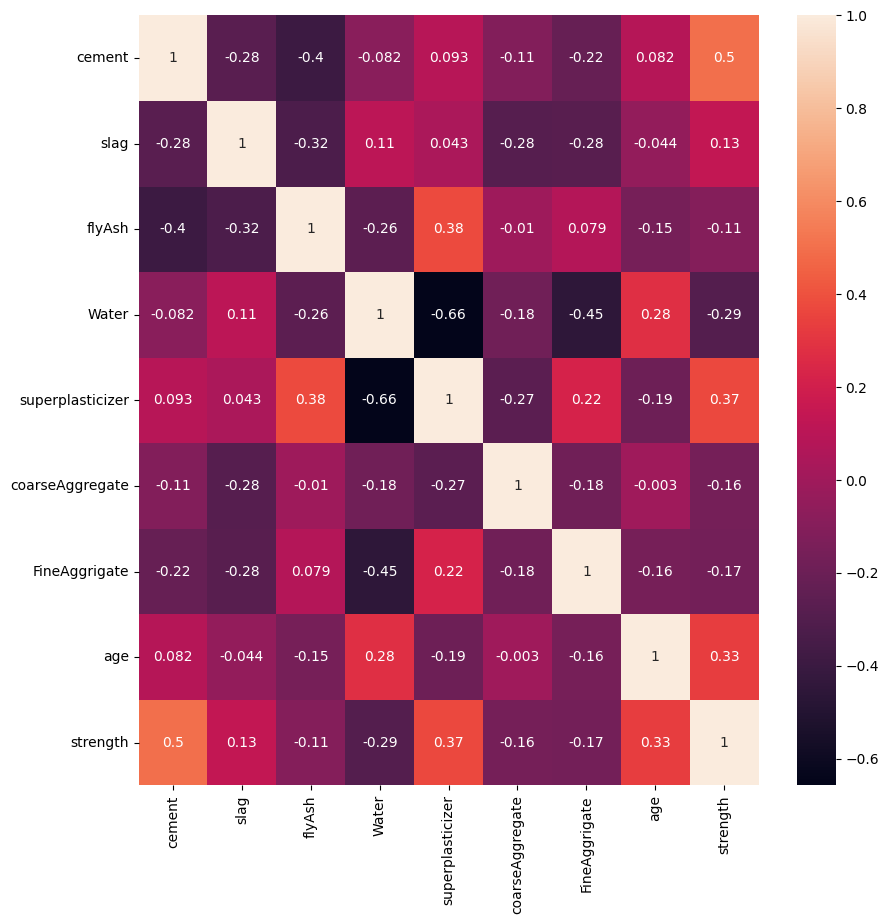

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

<Axes: xlabel='cement', ylabel='Count'>

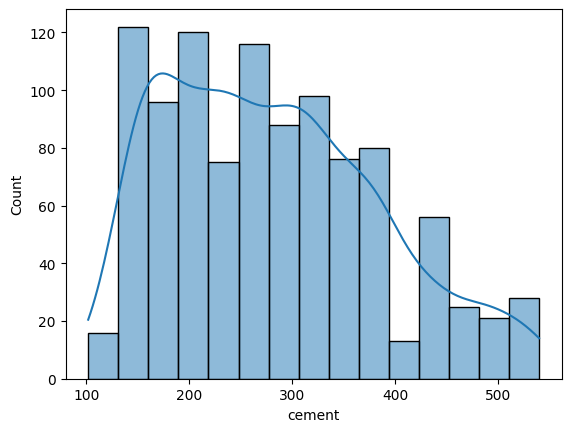

In [32]:
sns.histplot(df['cement'],kde='true')

# Most of the concrete mixtures have cement in between 130 kg/m^3 to 400 kg/m^3

<Axes: xlabel='slag', ylabel='Count'>

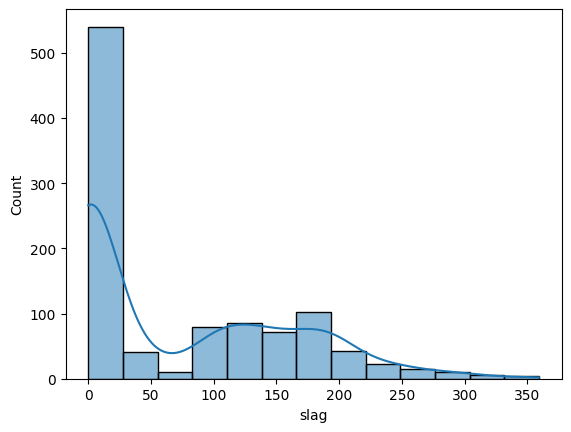

In [33]:
sns.histplot(df['slag'],kde='true')

# Around half of concrete mixture do not have slag in it

<Axes: xlabel='flyAsh', ylabel='Count'>

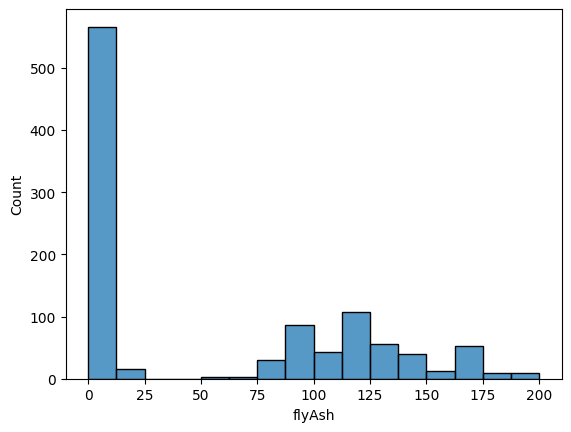

In [37]:
sns.histplot(df['flyAsh'],binwidth=12.5)

# More than 500 concrete mixture have fly ash quantity below 12.5 kg/m^3

<Axes: xlabel='Water', ylabel='Count'>

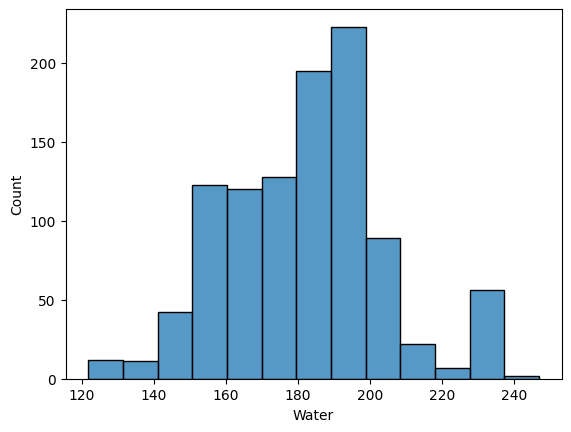

In [39]:
sns.histplot(df['Water'],binwidth=10)

# More than 700 concrete mixtures have Water quantinty between 150 kg/m^3 to 210 kg/m^3

<Axes: xlabel='superplasticizer', ylabel='Count'>

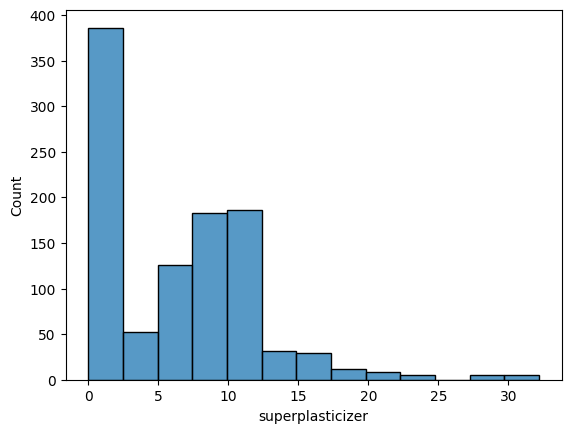

In [42]:
sns.histplot(df["superplasticizer"],binwidth=2.5)

<Axes: xlabel='FineAggrigate', ylabel='Count'>

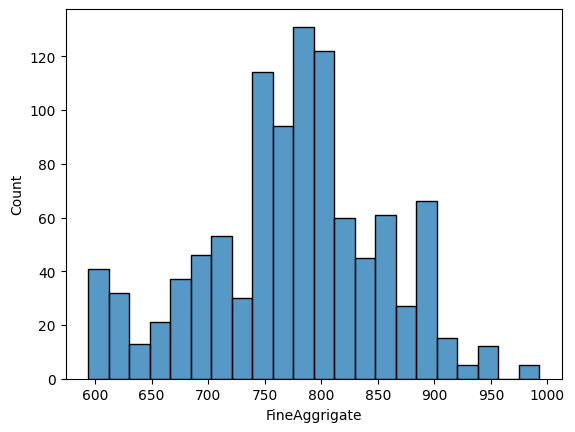

In [44]:
sns.histplot(df['FineAggrigate'])

<Axes: xlabel='coarseAggregate', ylabel='Count'>

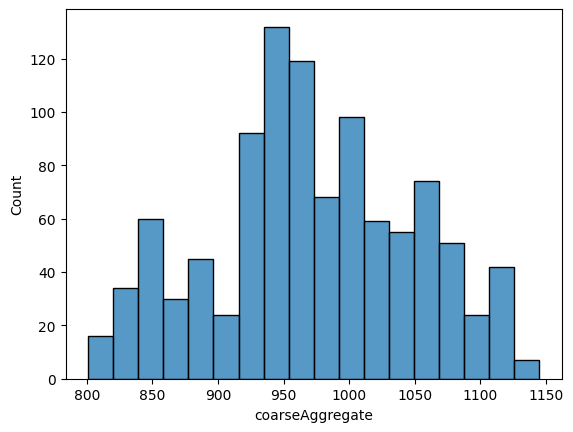

In [45]:
sns.histplot(df['coarseAggregate'])

Text(0, 0.5, 'strength')

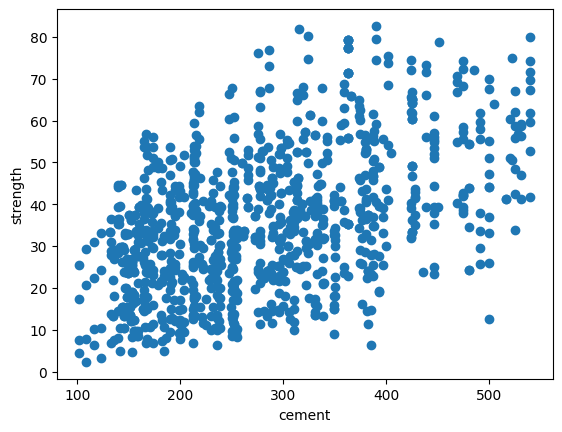

In [64]:
 plt.scatter(df['cement'],df['strength'])
 plt.xlabel('cement')
 plt.ylabel('strength')

# Cement quantity is positively affecting the strength of concrete

Text(0, 0.5, 'Strength')

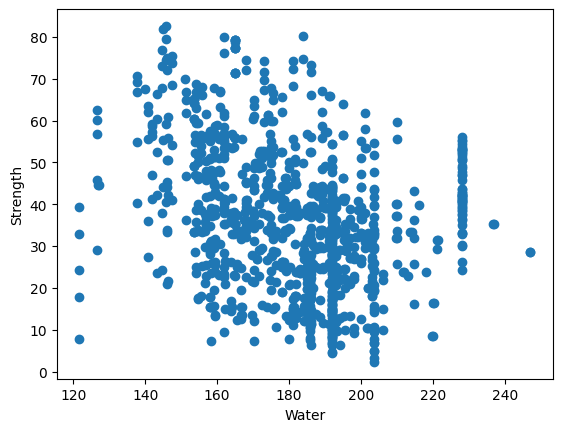

In [57]:
plt.scatter(df['Water'],df['strength'])
plt.xlabel("Water")
plt.ylabel("Strength")

# Quantity of water added for concrete is negatively affetcing concrete strength

Text(0, 0.5, 'Strength')

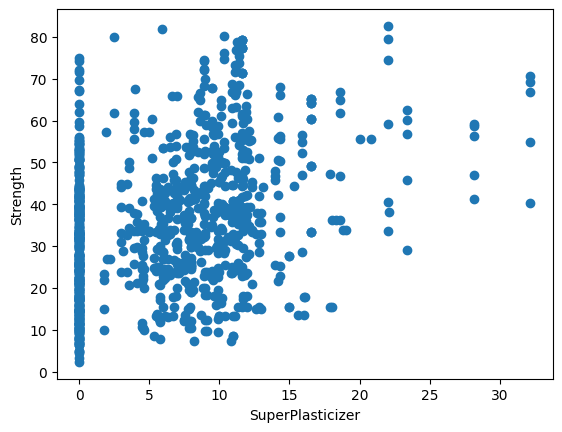

In [63]:
plt.scatter(df['superplasticizer'],df['strength'])
plt.xlabel("SuperPlasticizer")
plt.ylabel("Strength")

<Axes: ylabel='cement'>

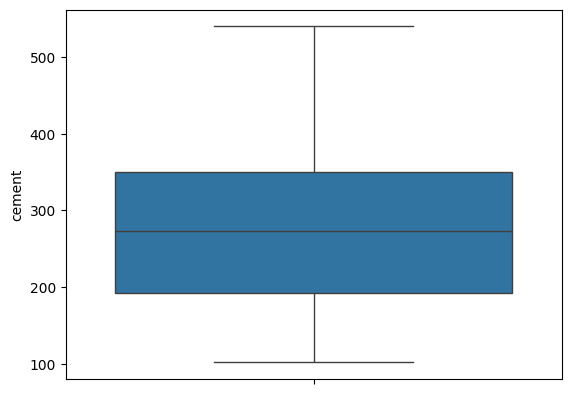

In [9]:
sns.boxplot(df['cement'])

<Axes: ylabel='slag'>

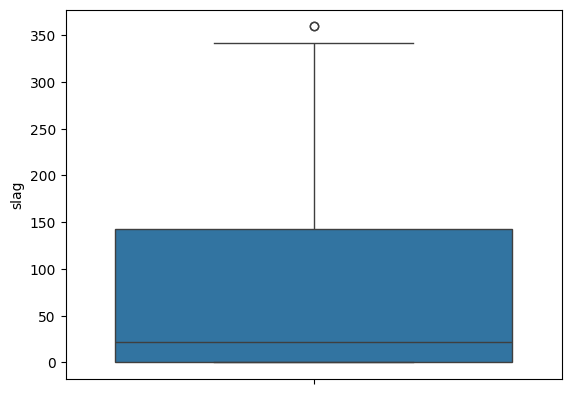

In [10]:
sns.boxplot(df['slag'])

<Axes: ylabel='flyAsh'>

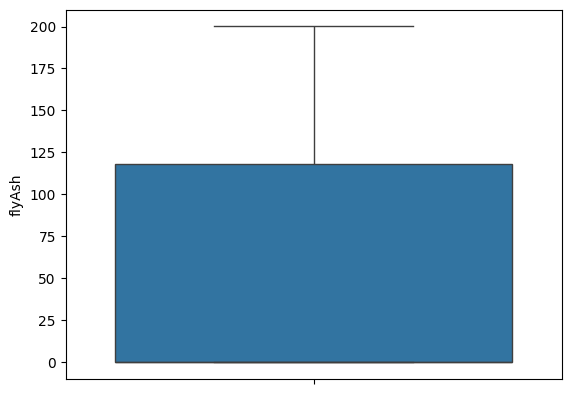

In [11]:
sns.boxplot(df["flyAsh"])

<Axes: ylabel='Water'>

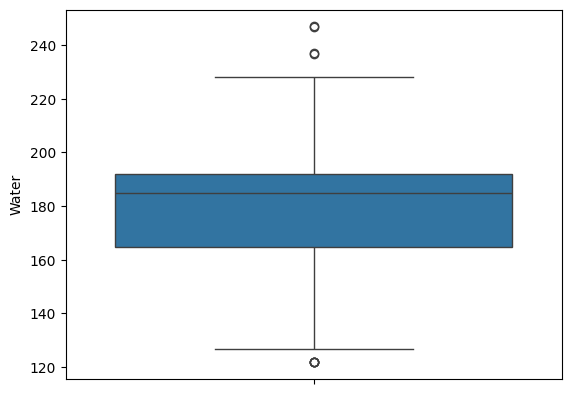

In [12]:
sns.boxplot(df["Water"])

<Axes: ylabel='superplasticizer'>

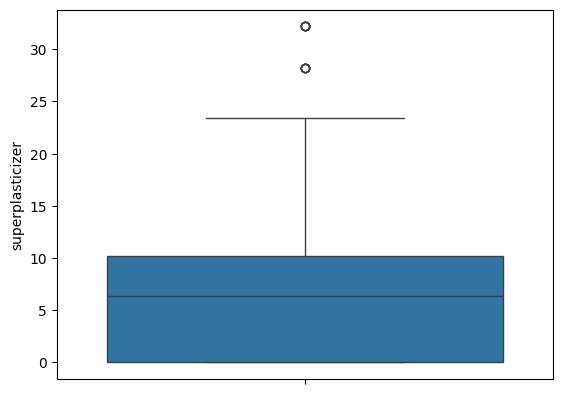

In [13]:
sns.boxplot(df["superplasticizer"])

<Axes: ylabel='coarseAggregate'>

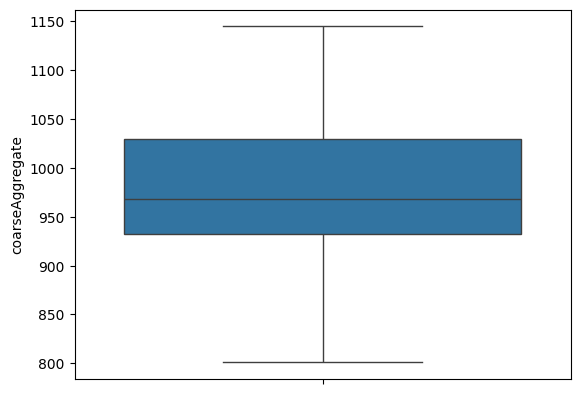

In [14]:
sns.boxplot(df["coarseAggregate"])

<Axes: ylabel='FineAggrigate'>

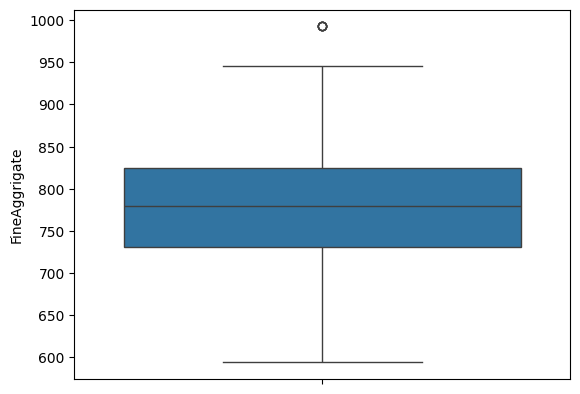

In [15]:
sns.boxplot(df["FineAggrigate"])

<Axes: ylabel='strength'>

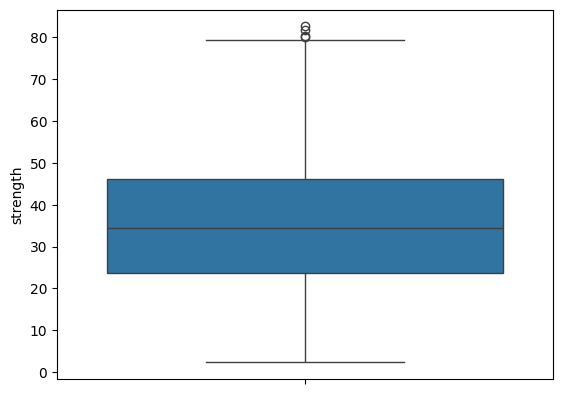

In [65]:
sns.boxplot(df['strength'])